<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**


# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_2022/Seminars/L3/train.csv", sep=',')

Mounted at /content/drive


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [ ]:
X = data.loc[:, :'PaymentMethod']
y = data.loc[:, 'Churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

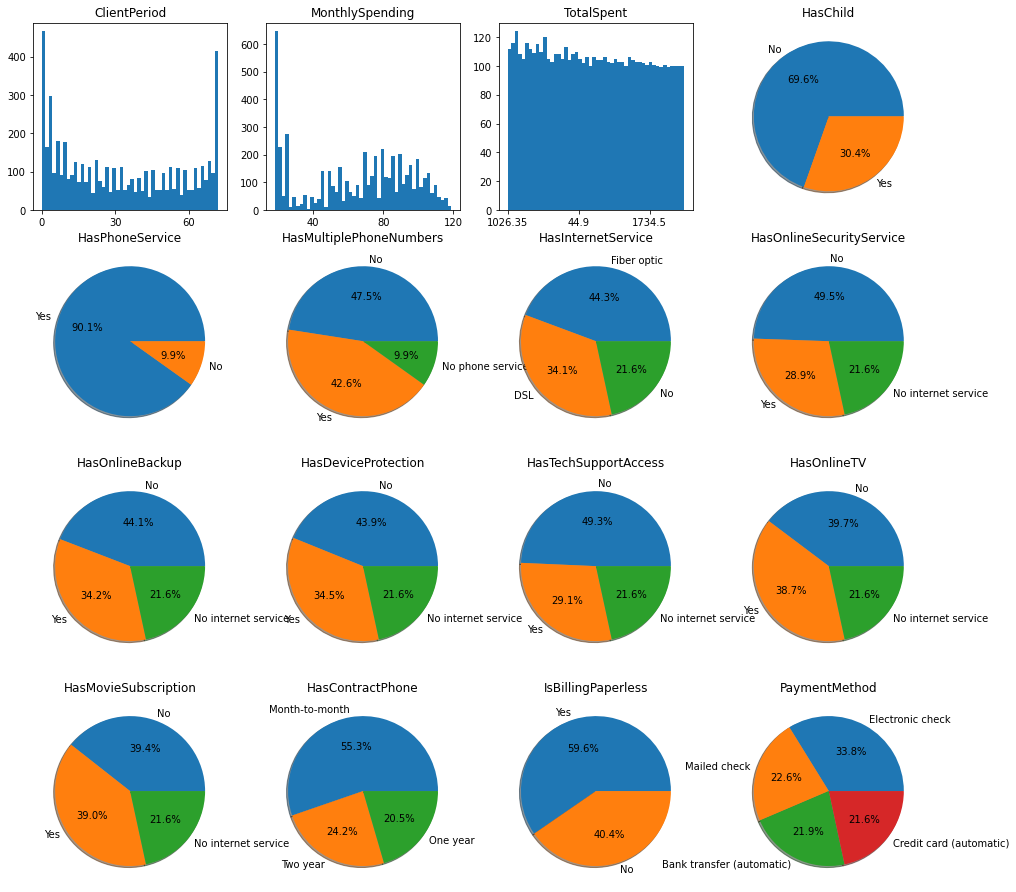

In [ ]:
fig = plt.figure(figsize = (16, 20))
fig.set_facecolor('white')
fig.tight_layout()
axes = list()
for i in range(len(num_cols)):
  axes.append(fig.add_subplot(5, 4, i+1))
  axes[i].hist(X[num_cols[i]], bins=50)
  axes[i].set_title(num_cols[i])
  axes[i].xaxis.set_major_locator(plt.MaxNLocator(3))

for i in range(len(num_cols), len(cat_cols)):
  axes.append(fig.add_subplot(5, 4, i+1))
  count = X[cat_cols[i]].value_counts()
  axes[i].pie(count, labels = count.index, autopct='%1.1f%%', shadow = True)
  axes[i].set_title(cat_cols[i])
plt.show()


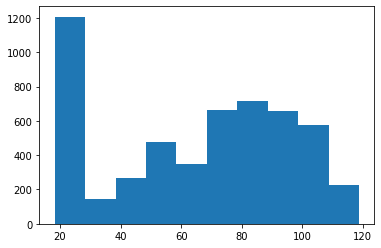

In [ ]:
plt.hist(X['MonthlySpending'])
plt.show()
X['MonthlySpending'].unique()
X['MonthlySpending'] =  [X['MonthlySpending'].mean() if spent <= 25 else spent for spent in X['MonthlySpending']]

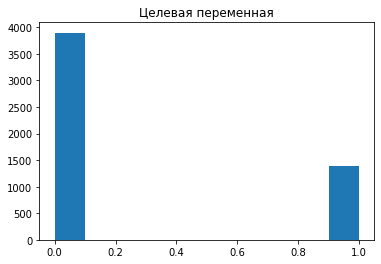

In [ ]:
plt.hist(y)
plt.title("Целевая переменная")
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_tr, X_test, y_tr, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

Нормализация данных. в одном столбце вылезли пустые строки

In [ ]:
scaler = StandardScaler()
def nanFighter(X):
  for i in range(len(X['TotalSpent'])):
    try:
      X.TotalSpent[i] = float(X.TotalSpent[i])
    except ValueError:
      X.TotalSpent[i] = float(0)
  X = X.astype({'TotalSpent': 'float'})
  return X
nanTransformer = FunctionTransformer(lambda data: nanFighter(data), validate=False)
numerical_selector = FunctionTransformer(lambda data: data[num_cols], validate=False)
num_preprocessor = Pipeline([('selector', numerical_selector), ('nan_fighter', nanTransformer), ('scaler', scaler)])

#labelEncoder и LabelBinarizer требуют только Х, а fit_transform еще и у.  обертка не сработала. Поэтому OrdinalEncoder:

label = OrdinalEncoder()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_selector = FunctionTransformer(lambda data: data[cat_cols], validate=False)
cat_preprocessor = Pipeline([('selector', cat_selector), ('label_coder', label)])
unite_preprocessor = FeatureUnion([('nums',num_preprocessor), ('cats', cat_preprocessor)])
logistic = LogisticRegression(max_iter=10000, tol=0.1, solver='liblinear')
#overall_pipe = Pipeline([('Union', unite_preprocessor), ('LogReg', logistic)])
X_new = unite_preprocessor.fit_transform(X_resampled, y_resampled)
search = GridSearchCV(logistic, param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]}, scoring='roc_auc')
#logistic.get_params().keys()
search.fit(X_new,y_resampled)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)
'''
#X_num = scaler.fit_transform(X[num_cols])
#print(X[num_cols])
label = LabelEncoder()
for col in cat_cols:
  X[col] = label.fit_transform(X[col])
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
#for col in cat_cols:
#  X[col] = ohe.fit_transform(X[col])
X_cat = ohe.fit_transform(X[cat_cols])
X_new = pd.concat([pd.DataFrame(X_num, columns=num_cols), pd.DataFrame(X_cat, columns=ohe.get_feature_names())], axis=1)
'''
pd.DataFrame(y_resampled).info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Best parameter (CV score=0.844):
{'C': 100}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7796 entries, 0 to 7795
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Churn   7796 non-null   int64
dtypes: int64(1)
memory usage: 61.0 KB


In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X_new, y_resampled, test_size=0.2)
model = LogisticRegressionCV(scoring='roc_auc', refit=True)
model.fit(X_tr, y_tr)
logistic.fit(X_tr, y_tr)

LogisticRegression(max_iter=10000, solver='liblinear', tol=0.1)

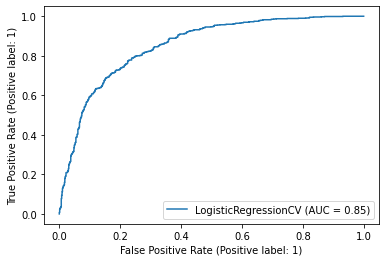

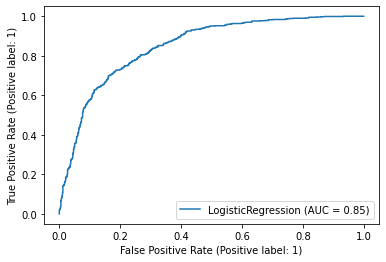

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_auc_score

RocCurveDisplay.from_estimator(model, X_test, y_test)
RocCurveDisplay.from_estimator(logistic, X_test, y_test)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
dt_test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_2022/Seminars/L3/test.csv", sep=',')
test_mod=pd.DataFrame()
test_mod = unite_preprocessor.fit_transform(dt_test, y=None)
submit = model.predict_proba(test_mod)

my_submit = pd.DataFrame({"Id": range(len(dt_test)), "Churn": submit[:, 1]})
my_submit.to_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_2022/Seminars/L3/submission.csv", index=False)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
import sys

!{sys.executable} -m pip install catboost[notebook]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0:	learn: 0.5374684	total: 1.3s	remaining: 1m 3s
1:	learn: 0.4699636	total: 2.63s	remaining: 1m 3s
2:	learn: 0.4368979	total: 2.64s	remaining: 41.3s
3:	learn: 0.4088439	total: 3.95s	remaining: 45.4s
4:	learn: 0.3717751	total: 5.23s	remaining: 47.1s
5:	learn: 0.3657131	total: 5.24s	remaining: 38.4s
6:	learn: 0.3379042	total: 6.58s	remaining: 40.5s
7:	learn: 0.3168924	total: 7.88s	remaining: 41.4s
8:	learn: 0.2943296	total: 9.17s	remaining: 41.8s
9:	learn: 0.2793556	total: 10.4s	remaining: 41.7s
10:	learn: 0.2654538	total: 11.7s	remaining: 41.5s
11:	learn: 0.2551336	total: 13s	remaining: 41.1s
12:	learn: 0.2423255	total: 14.3s	remaining: 40.7s
13:	learn: 0.2326339	total: 15.6s	remaining: 40.1s
14:	learn: 0.2244643	total: 16.9s	remaining: 39.5s
15:	learn: 0.2163609	total: 18.2s	remaining: 38.7s
16:	learn: 0.2095847	total: 19.5s	remaining: 37.8s
17:	learn: 0.2023995	total: 20.7s	remaining: 36.8s
18:	learn: 0.1953469	total: 22s	remaining: 35.9s
19:	learn: 0.1922919	total: 23.2s	remaining: 3

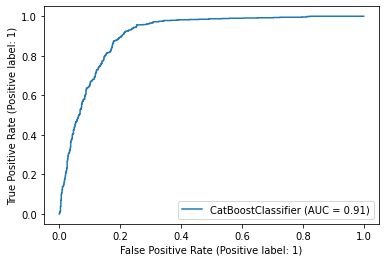

In [ ]:
from catboost import CatBoostClassifier

model_boost = CatBoostClassifier(iterations=50,
                           depth=16,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)
X_nn = nanFighter(X_resampled)
X_nn.TotalSpent
X_tr, X_test, y_tr, y_test = train_test_split(X_nn, y_resampled, test_size=0.2)
model_boost.fit(X_tr, y_tr, cat_features=cat_cols)
RocCurveDisplay.from_estimator(model_boost, X_test, y_test)

In [ ]:
dt_test = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_2022/Seminars/L3/test.csv", sep=',')
test_mod=pd.DataFrame()
test_mod = unite_preprocessor.fit_transform(dt_test, y=None)
dt_test = nanFighter(dt_test)
submit_boost = model_boost.predict_proba(dt_test)

my_submit = pd.DataFrame({"Id": range(len(dt_test)), "Churn": submit_boost[:,1]})
my_submit.to_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_2022/Seminars/L3/submission.csv", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [ ]:
mean_submit = [(x + y)/2 for x,y in zip(submit[:, 1], submit_boost[:, 1])]
print(mean_submit)
my_submit = pd.DataFrame({"Id": range(len(dt_test)), "Churn": mean_submit})
my_submit.to_csv("/content/drive/MyDrive/Colab_Notebooks/Deep_Learning_2022/Seminars/L3/submission.csv", index=False)

# Предсказания

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Наилучший результат: 
* ROC_AUC score: 0.85030
* cat_boost c grid-searched параметрами.

https://www.kaggle.com/competitions/advanced-dls-spring-2021/leaderboard